In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import time
from collections import Counter

In [2]:
dfwh = pd.read_csv("hitter_stats_2015-2019.csv",header= None)
headers = ["last_name", "first_name", "year", "player_age", "b_ab", "b_total_pa", "b_total_hits", "b_single", "b_double", "b_triple", "b_home_run", "b_strikeout", "b_walk", "b_k_percent", "b_bb_percent", "batting_avg", "slg_percent", "on_base_percent", "on_base_plus_slg", "isolated_power", "b_rbi", "b_lob", "b_total_bases", "r_total_caught_stealing", "r_total_stolen_base", "b_ab_scoring", "b_ball", "b_called_strike", "b_catcher_interf", "b_foul", "b_foul_tip", "b_game", "b_gnd_into_dp", "b_gnd_into_tp", "b_gnd_rule_double", "b_hit_by_pitch", "b_hit_ground", "b_hit_fly", "b_hit_into_play", "b_hit_line_drive", "b_hit_popup", "b_out_fly", "b_out_ground", "b_out_line_drive", "b_out_popup", "b_intent_ball", "b_intent_walk", "b_interference", "b_pinch_hit", "b_pinch_run", "b_pitchout", "b_played_dh", "b_sac_bunt", "b_sac_fly", "b_swinging_strike", "r_caught_stealing_2b", "r_caught_stealing_3b", "r_caught_stealing_home", "r_defensive_indiff", "r_interference", "r_pickoff_1b", "r_pickoff_2b", "r_pickoff_3b", "r_run", "r_stolen_base_2b", "r_stolen_base_3b", "r_stolen_base_home", "b_total_ball", "b_total_sacrifices", "b_total_strike", "b_total_swinging_strike", "b_total_pitches", "r_stolen_base_pct", "r_total_pickoff", "b_reached_on_error", "b_walkoff", "b_reached_on_int", "xba", "xslg", "woba", "xwoba", "xobp", "xiso", "wobacon", "xwobacon", "bacon", "xbacon", "xbadiff", "xslgdiff", "wobadif", "exit_velocity_avg", "launch_angle_avg", "sweet_spot_percent", "barrels", "barrel_batted_rate", "solidcontact_percent", "flareburner_percent", "poorlyunder_percent", "poorlytopped_percent", "poorlyweak_percent", "hard_hit_percent", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent", "oz_contact_percent", "out_zone_swing_miss", "out_zone_swing", "out_zone_percent", "out_zone", "meatball_swing_percent", "meatball_percent", "pitch_count_offspeed", "pitch_count_fastball", "pitch_count_breaking", "pitch_count", "iz_contact_percent", "in_zone_swing_miss", "in_zone_swing", "in_zone_percent", "in_zone", "edge_percent", "edge", "whiff_percent", "swing_percent", "pull_percent", "straightaway_percent", "opposite_percent", "batted_ball", "f_strike_percent", "groundballs_percent", "groundballs", "flyballs_percent", "flyballs", "linedrives_percent", "linedrives", "popups_percent", "popups", "rel_league_reaction_distance", "rel_league_burst_distance", "rel_league_routing_distance", "rel_league_bootup_distance", "f_bootup_distance", "n_bolts", "hp_to_1b", "sprint_speed", "?"]
dfwh.columns=headers
dfwh

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_catcher_interf,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_intent_walk,b_interference,b_pinch_hit,b_pinch_run,b_pitchout,b_played_dh,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_defensive_indiff,r_interference,r_pickoff_1b,r_pickoff_2b,r_pickoff_3b,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_sacrifices,b_total_strike,b_total_swinging_strike,b_total_pitches,r_stolen_base_pct,r_total_pickoff,b_reached_on_error,b_walkoff,b_reached_on_int,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups,rel_league_reaction_distance,rel_league_burst_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,n_bolts,hp_to_1b,sprint_speed,?
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,0,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,0,0,0,0,0,0,4,1,31,0,0,0,0,0,0,0,0,2,0,0,0,31,5,155,108,186,NaN,0,1,0,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,20.2,NaN
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,0,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,1,0,4,0,0,14,0,5,258,4,0,1,1,0,0,1,0,67,2,0,0,695,5,1392,1115,2087,NaN,1,4,0,0,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.5,NaN
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,0,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,16,0,3,0,0,134,0,9,258,0,1,0,0,0,0,1,0,73,0,0,0,1037,9,1451,1112,2488,NaN,1,5,0,0,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23.1,NaN
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,0,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,5,0,12,0,0,136,0,7,352,0,0,0,1,0,0,0,0,83,4,0

In [3]:
dfwh.dtypes

last_name                        object
first_name                       object
year                              int64
player_age                        int64
b_ab                              int64
b_total_pa                        int64
b_total_hits                      int64
b_single                          int64
b_double                          int64
b_triple                          int64
b_home_run                        int64
b_strikeout                       int64
b_walk                            int64
b_k_percent                     float64
b_bb_percent                    float64
batting_avg                     float64
slg_percent                     float64
on_base_percent                 float64
on_base_plus_slg                float64
isolated_power                  float64
b_rbi                             int64
b_lob                             int64
b_total_bases                     int64
r_total_caught_stealing           int64
r_total_stolen_base               int64


In [4]:
dfwh

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_catcher_interf,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_intent_walk,b_interference,b_pinch_hit,b_pinch_run,b_pitchout,b_played_dh,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_defensive_indiff,r_interference,r_pickoff_1b,r_pickoff_2b,r_pickoff_3b,r_run,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_sacrifices,b_total_strike,b_total_swinging_strike,b_total_pitches,r_stolen_base_pct,r_total_pickoff,b_reached_on_error,b_walkoff,b_reached_on_int,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups,rel_league_reaction_distance,rel_league_burst_distance,rel_league_routing_distance,rel_league_bootup_distance,f_bootup_distance,n_bolts,hp_to_1b,sprint_speed,?
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,0,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,0,0,0,0,0,0,4,1,31,0,0,0,0,0,0,0,0,2,0,0,0,31,5,155,108,186,NaN,0,1,0,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,20.2,NaN
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,0,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,1,0,4,0,0,14,0,5,258,4,0,1,1,0,0,1,0,67,2,0,0,695,5,1392,1115,2087,NaN,1,4,0,0,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30,NaN,NaN,NaN,NaN,NaN,1.0,NaN,26.5,NaN
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,0,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,16,0,3,0,0,134,0,9,258,0,1,0,0,0,0,1,0,73,0,0,0,1037,9,1451,1112,2488,NaN,1,5,0,0,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23.1,NaN
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,0,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,5,0,12,0,0,136,0,7,352,0,0,0,1,0,0,0,0,83,4,0

In [5]:
dfwh.isnull().sum()

last_name                          0
first_name                         0
year                               0
player_age                         0
b_ab                               0
b_total_pa                         0
b_total_hits                       0
b_single                           0
b_double                           0
b_triple                           0
b_home_run                         0
b_strikeout                        0
b_walk                             0
b_k_percent                        0
b_bb_percent                       0
batting_avg                        0
slg_percent                        0
on_base_percent                    0
on_base_plus_slg                   0
isolated_power                     0
b_rbi                              0
b_lob                              0
b_total_bases                      0
r_total_caught_stealing            0
r_total_stolen_base                0
b_ab_scoring                       0
b_ball                             0
b

In [6]:
#Gets rid of missing data
dfwh = dfwh.drop(["?","r_stolen_base_pct","rel_league_reaction_distance","rel_league_burst_distance","rel_league_routing_distance","rel_league_bootup_distance","f_bootup_distance","n_bolts","hp_to_1b","sprint_speed"], axis=1)
dfwh.dropna(subset=["meatball_swing_percent"],axis=0,inplace=True)
dfwh.dropna(subset=["oz_swing_miss_percent"],axis=0,inplace=True)
dfwh.dropna(subset=["oz_contact_percent"],axis=0,inplace=True)

In [7]:
dfwh.isnull().sum()

last_name                  0
first_name                 0
year                       0
player_age                 0
b_ab                       0
b_total_pa                 0
b_total_hits               0
b_single                   0
b_double                   0
b_triple                   0
b_home_run                 0
b_strikeout                0
b_walk                     0
b_k_percent                0
b_bb_percent               0
batting_avg                0
slg_percent                0
on_base_percent            0
on_base_plus_slg           0
isolated_power             0
b_rbi                      0
b_lob                      0
b_total_bases              0
r_total_caught_stealing    0
r_total_stolen_base        0
b_ab_scoring               0
b_ball                     0
b_called_strike            0
b_catcher_interf           0
b_foul                     0
b_foul_tip                 0
b_game                     0
b_gnd_into_dp              0
b_gnd_into_tp              0
b_gnd_rule_dou

In [8]:
#Get rid of columns that we don't need
dfwh = dfwh.drop(["b_catcher_interf","b_intent_walk","b_interference","b_pinch_hit","b_pinch_run","b_pitchout","b_played_dh","r_defensive_indiff","r_interference","r_pickoff_1b","r_pickoff_2b","r_pickoff_3b","r_run","b_total_sacrifices","b_reached_on_error","b_walkoff","b_reached_on_int"], axis=1)

In [9]:
#Get rid of players with less than 100 PA
dfwh.drop(dfwh[dfwh.b_total_pa < 10].index, inplace=True)

In [10]:
dfwh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 0 to 3594
Columns: 120 entries, last_name to popups
dtypes: float64(51), int64(67), object(2)
memory usage: 3.3+ MB


In [11]:
dfwh.describe(include="all")

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
count,3584,3584,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.00000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000
unique,1033,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Garcia,Matt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
dfwh.shape

(3584, 120)

In [13]:
dfwh.loc[dfwh['year'] == 2015].loc[dfwh['player_age'] == 25]

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
371,Altuve,Jose,2015,25,638,689,200,141,40,4,15,67,33,9.7,4.8,0.313,0.459,0.351,0.810,0.146,66,207,293,13,38,111,662,331,434,9,154,17,0,3,9,95,18,580,85,2,108,198,51,40,30,3,6,130,11,2,0,31,7,0,745,1482,1151,2227,8,0.273,0.390,0.347,0.305,0.317,0.116,0.367,0.317,0.347,0.305,0.040,0.069,0.042,85.8,10.5,31.6,18,3.1,4.8,24.0,26.7,36.4,5.0,28.8,70.5,6.6,34.1,20.3,79.7,81,399,52.5,1170,80.4,7.3,200,1385,587,2227,93.4,49,745,47.5,1057,39.9,889,11.4,51.4,39.8,40.9,19.3,580,39.6,47.6,276,21.7,126,23.4,136,7.2,42
373,Hernandez,Cesar,2015,25,405,452,110,85,20,4,1,86,40,19.0,8.8,0.272,0.348,0.336,0.684,0.077,35,129,141,5,19,84,564,265,260,10,127,6,0,3,2,57,5,324,48,0,38,139,35,8,4,4,1,165,5,0,0,18,1,0,598,1030,765,1628,5,0.272,0.337,0.306,0.303,0.340,0.065,0.339,0.335,0.344,0.344,0.000,0.011,0.003,82.7,2.4,28.1,4,1.2,3.4,27.2,15.1,42.0,11.1,26.9,66.9,11.7,26.1,47.5,52.5,103,217,51.2,833,78.6,6.9,220,1070,328,1628,88.3,62,532,48.8,795,42.9,699,22.0,46.0,30.2,40.4,29.3,324,33.6,58.6,190,13.3,43,25.6,83,2.5,8
374,Segura,Jean,2015,25,560,584,144,117,16,5,6,93,13,15.9,2.2,0.257,0.336,0.279,0.615,0.079,50,190,188,6,25,122,563,336,427,22,142,14,0,0,6,75,7,472,62,0,61,220,40,21,7,3,2,191,5,1,0,22,3,0,617,1440,1104,2057,2,0.256,0.330,0.268,0.267,0.279,0.072,0.306,0.305,0.307,0.306,0.001,0.006,0.001,86.5,4.0,26.1,6,1.3,3.8,22.9,19.5,48.7,3.8,26.3,69.2,11.8,36.3,28.8,71.2,106,368,49.2,1013,76.9,7.6,158,1395,496,2057,88.2,85,722,50.8,1044,42.6,876,17.5,53.0,22.9,40.5,36.7,472,35.1,59.5,281,14.4,68,21.6,102,4.4,21
375,Castro,Starlin,2015,25,547,578,145,109,23,2,11,91,21,15.7,3.6,0.265,0.375,0.296,0.671,0.110,69,248,205,5,5,156,645,381,372,20,151,18,0,0,5,72,11,461,61,1,66,199,43,26,23,1,4,205,5,0,0,5,0,0,715,1421,1040,2136,0,0.256,0.379,0.288,0.287,0.288,0.122,0.328,0.326,0.315,0.305,0.009,-0.004,0.001,86.2,6.9,28.6,20,4.3,3.9,21.7,20.0,46.6,3.5,28.0,64.8,12.3,32.7,34.3,65.7,121,353,50.5,1079,72.4,7.3,196,1307,607,2136,87.7,84,685,49.5,1057,42.6,909,19.7,48.6,35.6,43.6,20.6,461,23.7,54.9,253,16.7,77,22.6,104,5.9,27
377,Lake,Junior,2015,25,80,84,16,8,7,0,1,29,4,34.5,4.8,0.200,0.325,0.238,0.563,0.125,5,40,26,0,4,18,117,59,55,4,29,1,0,0,0,8,1,51,7,0,10,20,6,0,0,0,0,62,0,0,0,2,2,0,129,228,169,357,0,0.221,0.324,0.246,0.254,0.258,0.103,0.351,0.365,0.314,0.346,-0.021,0.001,-0.008,85.6,4.5,27.5,1,2.0,11.8,19.6,19.6,35.3,11.8,35.3,66.9,

In [14]:
dfwh.loc[dfwh['last_name'] == 'Castro'].loc[dfwh['first_name'] == ' Jason'].loc[dfwh['year'] == 2015]

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
301,Castro,Jason,2015,28,337,375,71,41,19,0,11,115,33,30.7,8.8,0.211,0.365,0.283,0.648,0.154,31,152,123,0,0,71,510,231,241,15,104,5,0,0,2,20,13,225,38,0,51,73,26,9,4,0,3,230,0,0,0,0,0,0,547,929,698,1476,0,0.215,0.351,0.284,0.282,0.287,0.135,0.367,0.364,0.316,0.323,-0.004,0.014,0.002,88.6,15.6,36.4,14,6.2,6.7,26.7,27.1,33.3,0.0,31.1,68.6,26.3,26.3,50.3,49.7,99,197,50.7,749,71.6,7.4,191,887,377,1476,73.7,131,499,49.3,727,43.4,640,33.0,47.2,43.1,32.4,24.4,225,32.0,39.1,88,28.4,64,28.4,64,4.0,9


In [15]:
dfwh

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [16]:
dfwh[(dfwh.first_name != ' Torii') | (dfwh.first_name != ' Aramis')]

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [17]:
dfwh

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [19]:
astro_hitters = pd.DataFrame(columns=dfwh.columns)
mlb_hitters = dfwh

In [20]:
#Add astro hitters to their data frame
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Altuve'].loc[dfwh['first_name'] == ' Jose'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Rasmus'].loc[dfwh['first_name'] == ' Colby'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Valbuena'].loc[dfwh['first_name'] == ' Luis'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Carter'].loc[dfwh['first_name'] == ' Chris'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Castro'].loc[dfwh['first_name'] == ' Jason'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Preston'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Conger'].loc[dfwh['first_name'] == ' Hank'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Lowrie'].loc[dfwh['first_name'] == ' Jed'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Villar'].loc[dfwh['first_name'] == ' Jonathan'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gomez'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Grossman'].loc[dfwh['first_name'] == ' Robbie'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Singleton'].loc[dfwh['first_name'] == ' Jon'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Santana'].loc[dfwh['first_name'] == ' Domingo'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2015], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Rasmus'].loc[dfwh['first_name'] == ' Colby'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Valbuena'].loc[dfwh['first_name'] == ' Luis'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Castro'].loc[dfwh['first_name'] == ' Jason'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Preston'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gomez'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reed'].loc[dfwh['first_name'] == ' AJ'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Hernandez'].loc[dfwh['first_name'] == ' Teoscar'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Worth'].loc[dfwh['first_name'] == ' Danny'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kratz'].loc[dfwh['first_name'] == ' Erik'].loc[dfwh['year'] == 2016], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Beltran'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'McCann'].loc[dfwh['first_name'] == ' Brian'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Aoki'].loc[dfwh['first_name'] == ' Norichika'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Davis'].loc[dfwh['first_name'] == ' J.D.'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Centeno'].loc[dfwh['first_name'] == ' Juan'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maybin'].loc[dfwh['first_name'] == ' Cameron'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2017], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gattis'].loc[dfwh['first_name'] == ' Evan'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gonzalez'].loc[dfwh['first_name'] == ' Marwin'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'McCann'].loc[dfwh['first_name'] == ' Brian'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Davis'].loc[dfwh['first_name'] == ' J.D.'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maldonado'].loc[dfwh['first_name'] == ' Martin'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Kyle'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Federowicz'].loc[dfwh['first_name'] == ' Tim'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Straw'].loc[dfwh['first_name'] == ' Myles'].loc[dfwh['year'] == 2018], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Bregman'].loc[dfwh['first_name'] == ' Alex'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Springer'].loc[dfwh['first_name'] == ' George'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Correa'].loc[dfwh['first_name'] == ' Carlos'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'White'].loc[dfwh['first_name'] == ' Tyler'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Kemp'].loc[dfwh['first_name'] == ' Tony'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Gurriel'].loc[dfwh['first_name'] == ' Yuli'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Reddick'].loc[dfwh['first_name'] == ' Josh'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stassi'].loc[dfwh['first_name'] == ' Max'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Fisher'].loc[dfwh['first_name'] == ' Derek'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Maldonado'].loc[dfwh['first_name'] == ' Martin'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Tucker'].loc[dfwh['first_name'] == ' Kyle'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Straw'].loc[dfwh['first_name'] == ' Myles'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Brantley'].loc[dfwh['first_name'] == ' Michael'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Marisnick'].loc[dfwh['first_name'] == ' Jake'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Chirinos'].loc[dfwh['first_name'] == ' Robinson'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Alvarez'].loc[dfwh['first_name'] == ' Yordan'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Diaz'].loc[dfwh['first_name'] == ' Aledmys'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Mayfield'].loc[dfwh['first_name'] == ' Jack'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Toro'].loc[dfwh['first_name'] == ' Abraham'].loc[dfwh['year'] == 2019], ignore_index = True)
astro_hitters = astro_hitters.append(dfwh.loc[dfwh['last_name'] == 'Stubbs'].loc[dfwh['first_name'] == ' Garrett'].loc[dfwh['year'] == 2019], ignore_index = True)


astro_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Altuve,Jose,2015,25,638,689,200,141,40,4,15,67,33,9.7,4.8,0.313,0.459,0.351,0.810,0.146,66,207,293,13,38,111,662,331,434,9,154,17,0,3,9,95,18,580,85,2,108,198,51,40,30,3,6,130,11,2,0,31,7,0,745,1482,1151,2227,8,0.273,0.390,0.347,0.305,0.317,0.116,0.367,0.317,0.347,0.305,0.040,0.069,0.042,85.8,10.5,31.6,18,3.1,4.8,24.0,26.7,36.4,5.0,28.8,70.5,6.6,34.1,20.3,79.7,81,399,52.5,1170,80.4,7.3,200,1385,587,2227,93.4,49,745,47.5,1057,39.9,889,11.4,51.4,39.8,40.9,19.3,580,39.6,47.6,276,21.7,126,23.4,136,7.2,42
1,Altuve,Jose,2016,26,640,717,216,145,42,5,24,70,60,9.8,8.4,0.338,0.531,0.395,0.926,0.194,96,202,340,10,30,137,836,351,432,16,161,15,0,2,7,73,23,580,120,0,106,194,54,25,38,3,7,184,7,3,0,22,8,0,921,1553,1202,2474,4,0.324,0.528,0.391,0.391,0.386,0.201,0.408,0.409,0.374,0.362,0.014,0.003,0.000,87.5,10.9,39.7,40,6.9,6.6,29.8,20.5,31.7,4.5,36.2,70.0,10.3,30.5,24.9,75.1,103,413,54.8,1355,78.8,6.7,282,1437,674,2474,89.7,81,783,45.2,1118,41.2,1018,15.4,48.3,39.3,41.2,19.5,580,40.3,43.4,252,22.2,129,30.0,174,4.3,25
2,Altuve,Jose,2017,27,590,662,204,137,39,4,24,84,58,12.7,8.8,0.346,0.547,0.409,0.957,0.202,81,215,323,6,32,132,763,372,403,19,153,19,0,3,9,87,34,511,83,0,75,179,46,26,0,1,4,185,6,0,0,23,9,0,832,1476,1104,2308,4,0.303,0.494,0.405,0.376,0.373,0.185,0.435,0.397,0.400,0.352,0.043,0.053,0.029,85.5,9.1,34.6,34,6.7,4.9,25.8,20.5,35.0,7.0,27.6,67.5,10.0,31.7,27.8,72.2,113,407,55.7,1282,71.5,6.6,249,1294,758,2308,90.0,69,688,44.3,1019,41.3,950,16.8,47.6,36.2,38.2,25.6,511,42.0,48.3,247,21.3,109,25.2,129,5.1,26
3,Altuve,Jose,2018,28,534,599,169,125,29,2,13,79,55,13.2,9.2,0.316,0.451,0.384,0.835,0.135,61,204,241,4,17,115,714,347,365,15,137,17,0,3,6,69,24,459,76,0,79,169,41,18,0,3,1,180,4,0,0,14,3,0,769,1354,1007,2123,2,0.296,0.459,0.364,0.358,0.368,0.159,0.385,0.378,0.371,0.347,0.020,-0.008,0.006,86.3,9.5,34.0,27,5.9,5.2,24.8,22.0,36.2,5.9,33.8,67.8,11.6,30.0,29.9,70.1,103,345,54.2,1149,75.2,6.8,264,1249,601,2123,88.4,76,658,45.8,970,42.9,909,17.9,47.3,34.0,45.3,20.7,459,44.4,48.1,221,22.4,103,25.5,117,3.9,18
4,Altuve,Jose,2019,29,500,548,149,88,27,3,31,82,41,15.0,7.5,0.298,0.550,0.352,0.902,0.252,74,182,275,5,6,94,673,320,318,15,124,19,0,0,3,60,34,422,54,1,58,154,29,32,0,1,3,194,4,1,0,4,2,0,724,1270,950,1994,1,0.282,0.492,0.374,0.350,0.339,0.208,0.414,0.383,0.354,0.336,0.016,0.058,0.024,86.1,8.8,29.4,34,8.1,4.0,21

In [21]:
mlb_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [22]:
#Remove Astro hitters from mlb data frame
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Altuve') | (mlb_hitters.first_name != ' Jose') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Rasmus') | (mlb_hitters.first_name != ' Colby') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Valbuena') | (mlb_hitters.first_name != ' Luis') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Carter') | (mlb_hitters.first_name != ' Chris') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Castro') | (mlb_hitters.first_name != ' Jason') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Preston') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Conger') | (mlb_hitters.first_name != ' Hank') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Lowrie') | (mlb_hitters.first_name != ' Jed') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Villar') | (mlb_hitters.first_name != ' Jonathan') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gomez') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Grossman') | (mlb_hitters.first_name != ' Robbie') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Singleton') | (mlb_hitters.first_name != ' Jon') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Santana') | (mlb_hitters.first_name != ' Domingo') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2015)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Rasmus') | (mlb_hitters.first_name != ' Colby') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Valbuena') | (mlb_hitters.first_name != ' Luis') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Castro') | (mlb_hitters.first_name != ' Jason') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Preston') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gomez') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reed') | (mlb_hitters.first_name != ' AJ') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Hernandez') | (mlb_hitters.first_name != ' Teoscar') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Worth') | (mlb_hitters.first_name != ' Danny') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kratz') | (mlb_hitters.first_name != ' Erik') | (mlb_hitters.year != 2016)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Beltran') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'McCann') | (mlb_hitters.first_name != ' Brian') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Aoki') | (mlb_hitters.first_name != ' Norichika') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Davis') | (mlb_hitters.first_name != ' J.D.') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Centeno') | (mlb_hitters.first_name != ' Juan') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maybin') | (mlb_hitters.first_name != ' Cameron') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2017)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gattis') | (mlb_hitters.first_name != ' Evan') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gonzalez') | (mlb_hitters.first_name != ' Marwin') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'McCann') | (mlb_hitters.first_name != ' Brian') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Davis') | (mlb_hitters.first_name != ' J.D.') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maldonado') | (mlb_hitters.first_name != ' Martin') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Kyle') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Federowicz') | (mlb_hitters.first_name != ' Tim') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Straw') | (mlb_hitters.first_name != ' Myles') | (mlb_hitters.year != 2018)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Springer') | (mlb_hitters.first_name != ' George') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Correa') | (mlb_hitters.first_name != ' Carlos') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'White') | (mlb_hitters.first_name != ' Tyler') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Kemp') | (mlb_hitters.first_name != ' Tony') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Bregman') | (mlb_hitters.first_name != ' Alex') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Gurriel') | (mlb_hitters.first_name != ' Yuli') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Reddick') | (mlb_hitters.first_name != ' Josh') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stassi') | (mlb_hitters.first_name != ' Max') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Fisher') | (mlb_hitters.first_name != ' Derek') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Maldonado') | (mlb_hitters.first_name != ' Martin') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Tucker') | (mlb_hitters.first_name != ' Kyle') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Straw') | (mlb_hitters.first_name != ' Myles') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Brantley') | (mlb_hitters.first_name != ' Michael') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Marisnick') | (mlb_hitters.first_name != ' Jake') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Chirinos') | (mlb_hitters.first_name != ' Robinson') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Alvarez') | (mlb_hitters.first_name != ' Yordan') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Diaz') | (mlb_hitters.first_name != ' Aledmys') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Mayfield') | (mlb_hitters.first_name != ' Jack') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Toro') | (mlb_hitters.first_name != ' Abraham') | (mlb_hitters.year != 2019)]
mlb_hitters = mlb_hitters[(mlb_hitters.last_name != 'Stubbs') | (mlb_hitters.first_name != ' Garrett') | (mlb_hitters.year != 2019)]


mlb_hitters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Colon,Bartolo,2015,42,58,64,8,7,1,0,0,24,0,37.5,0.0,0.138,0.155,0.141,0.296,0.017,4,29,9,0,0,17,29,47,24,2,31,2,0,0,1,4,0,39,4,0,2,25,3,3,0,4,1,31,0,0,0,0,0,0,31,155,108,186,0,0.163,0.180,0.136,0.160,0.176,0.015,0.212,0.254,0.229,0.273,-0.025,-0.025,-0.024,77.6,-5.6,23.1,0,0.0,0.0,23.1,10.3,48.7,17.9,15.4,52.8,23.1,46.0,55.2,44.8,16,29,33.9,63,47.1,9.1,5,143,38,186,76.9,15,65,66.1,123,46.8,87,33.0,50.5,20.5,48.7,30.8,39,35.9,69.2,27,5.1,2,17.9,7,7.7,3
1,Hunter,Torii,2015,40,521,567,125,81,22,0,22,105,35,18.5,6.2,0.240,0.409,0.293,0.702,0.169,81,197,213,5,2,121,648,277,433,20,139,14,0,2,6,48,18,421,59,0,77,174,29,30,4,0,5,258,4,0,1,2,0,0,695,1392,1115,2087,1,0.236,0.375,0.304,0.291,0.290,0.139,0.343,0.326,0.297,0.294,0.004,0.034,0.013,88.1,10.1,28.5,21,5.0,5.2,21.6,24.5,40.1,3.6,34.7,72.3,17.2,34.1,36.2,63.8,128,354,49.8,1039,80.4,7.6,271,1334,466,2087,82.8,130,758,50.2,1048,42.4,884,23.2,53.3,34.4,41.1,24.5,421,32.8,49.4,208,22.6,95,20.9,88,7.1,30
2,Ortiz,David,2015,40,528,614,144,70,37,0,37,95,77,15.5,12.5,0.273,0.553,0.360,0.913,0.280,108,244,292,1,0,136,904,339,410,13,146,16,0,3,0,26,36,442,79,3,77,156,48,33,55,0,9,258,0,1,0,0,0,0,1037,1451,1112,2488,1,0.303,0.615,0.379,0.416,0.388,0.312,0.417,0.468,0.326,0.365,-0.030,-0.062,-0.037,92.9,15.6,35.1,58,13.1,8.4,25.3,24.2,27.4,1.6,48.9,70.5,17.0,26.5,34.9,65.1,135,387,58.8,1462,76.9,5.7,368,1424,571,2488,83.0,123,723,41.2,1026,41.8,1041,23.2,44.6,41.9,36.4,21.7,442,25.6,37.6,166,25.6,113,28.7,127,8.1,36
3,Rodriguez,Alex,2015,40,523,620,131,75,22,1,33,145,84,23.4,13.5,0.250,0.486,0.356,0.842,0.235,86,219,254,0,4,110,917,386,362,24,151,17,0,1,6,33,25,385,73,0,72,152,22,25,16,0,7,352,0,0,0,4,0,0,1018,1485,1099,2503,0,0.249,0.493,0.361,0.363,0.356,0.243,0.424,0.428,0.340,0.340,0.001,-0.007,-0.002,91.3,12.1,31.7,42,10.9,8.1,20.5,24.2,35.3,1.0,43.4,67.3,26.1,24.3,45.8,54.2,151,330,54.3,1360,75.3,6.2,283,1537,619,2503,73.9,201,769,45.7,1143,42.3,1058,32.0,43.9,38.4,44.2,17.4,385,31.3,43.6,168,25.2,97,24.7,95,6.5,25
4,Ramirez,Aramis,2015,37,475,516,117,68,31,1,17,68,31,13.2,6.0,0.246,0.423,0.297,0.720,0.177,75,228,201,0,1,126,559,238,376,13,137,23,0,2,5,30,16,412,71,0,85,148,49,36,12,0,5,172,0,0,0,1,0,0,617,1198,960,1815,0,0.249,0.412,0.309,0.307,0.301,0.162,0.329,0.327,0.284,0.289,-0.003,0.011,0.002,87.4,15.8,34.5,23,5.6,6.6,24.0,30.8,29.6,3.4,34.2,73.5,12.2,3

In [23]:
mlb_b_k_percent = []
mlb_b_bb_percent = []
mlb_batting_avg = []
mlb_slg_percent = []
mlb_on_base_percent = []
mlb_on_base_plus_slg = []
mlb_isolated_power = []
mlb_wobacon = []
mlb_bacon = []
mlb_exit_velocity_avg = []
mlb_launch_angle_avg = []
mlb_sweet_spot_percent = []
mlb_barrel_batted_rate = []
mlb_solidcontact_percent = []
mlb_flareburner_percent = []
mlb_poorlyunder_percent = []
mlb_poorlytopped_percent = []
mlb_poorlyweak_percent = []
mlb_hard_hit_percent = []
mlb_z_swing_percent = []
mlb_z_swing_miss_percent = []
mlb_oz_swing_percent = []
mlb_oz_swing_miss_percent = []
mlb_oz_contact_percent = []
mlb_meatball_swing_percent = []
mlb_meatball_percent = []
mlb_iz_contact_percent = []
mlb_in_zone_percent = []
mlb_edge_percent = []
mlb_whiff_percent = []
mlb_swing_percent = []
mlb_pull_percent = []
mlb_straightaway_percent = []
mlb_opposite_percent = []
mlb_groundballs_percent = []
mlb_flyballs_percent = []
mlb_linedrives_percent = []
mlb_popups_percent = []



mlb_all_stats = [
    
mlb_b_k_percent,
mlb_b_bb_percent,
mlb_batting_avg,
mlb_slg_percent,
mlb_on_base_percent,
mlb_on_base_plus_slg,
mlb_isolated_power,
mlb_wobacon,
mlb_bacon,
mlb_exit_velocity_avg,
mlb_launch_angle_avg,
mlb_sweet_spot_percent,
mlb_barrel_batted_rate,
mlb_solidcontact_percent,
mlb_flareburner_percent,
mlb_poorlyunder_percent,
mlb_poorlytopped_percent,
mlb_poorlyweak_percent,
mlb_hard_hit_percent,
mlb_z_swing_percent,
mlb_z_swing_miss_percent,
mlb_oz_swing_percent,
mlb_oz_swing_miss_percent,
mlb_oz_contact_percent,
mlb_meatball_swing_percent,
mlb_meatball_percent,
mlb_iz_contact_percent,
mlb_in_zone_percent,
mlb_edge_percent,
mlb_whiff_percent,
mlb_swing_percent,
mlb_pull_percent,
mlb_straightaway_percent,
mlb_opposite_percent,
mlb_groundballs_percent,
mlb_flyballs_percent,
mlb_linedrives_percent,
mlb_popups_percent
]


astro_hitters_b_k_percent = []
astro_hitters_b_bb_percent = []
astro_hitters_batting_avg = []
astro_hitters_slg_percent = []
astro_hitters_on_base_percent = []
astro_hitters_on_base_plus_slg = []
astro_hitters_isolated_power = []
astro_hitters_wobacon = []
astro_hitters_bacon = []
astro_hitters_exit_velocity_avg = []
astro_hitters_launch_angle_avg = []
astro_hitters_sweet_spot_percent = []
astro_hitters_barrel_batted_rate = []
astro_hitters_solidcontact_percent = []
astro_hitters_flareburner_percent = []
astro_hitters_poorlyunder_percent = []
astro_hitters_poorlytopped_percent = []
astro_hitters_poorlyweak_percent = []
astro_hitters_hard_hit_percent = []
astro_hitters_z_swing_percent = []
astro_hitters_z_swing_miss_percent = []
astro_hitters_oz_swing_percent = []
astro_hitters_oz_swing_miss_percent = []
astro_hitters_oz_contact_percent = []
astro_hitters_meatball_swing_percent = []
astro_hitters_meatball_percent = []
astro_hitters_iz_contact_percent = []
astro_hitters_in_zone_percent = []
astro_hitters_edge_percent = []
astro_hitters_whiff_percent = []
astro_hitters_swing_percent = []
astro_hitters_pull_percent = []
astro_hitters_straightaway_percent = []
astro_hitters_opposite_percent = []
astro_hitters_groundballs_percent = []
astro_hitters_flyballs_percent = []
astro_hitters_linedrives_percent = []
astro_hitters_popups_percent = []


astros_hitters_all_stats = [

astro_hitters_b_k_percent,
astro_hitters_b_bb_percent,
astro_hitters_batting_avg,
astro_hitters_slg_percent,
astro_hitters_on_base_percent,
astro_hitters_on_base_plus_slg,
astro_hitters_isolated_power,
astro_hitters_wobacon,
astro_hitters_bacon,
astro_hitters_exit_velocity_avg,
astro_hitters_launch_angle_avg,
astro_hitters_sweet_spot_percent,
astro_hitters_barrel_batted_rate,
astro_hitters_solidcontact_percent,
astro_hitters_flareburner_percent,
astro_hitters_poorlyunder_percent,
astro_hitters_poorlytopped_percent,
astro_hitters_poorlyweak_percent,
astro_hitters_hard_hit_percent,
astro_hitters_z_swing_percent,
astro_hitters_z_swing_miss_percent,
astro_hitters_oz_swing_percent,
astro_hitters_oz_swing_miss_percent,
astro_hitters_oz_contact_percent,
astro_hitters_meatball_swing_percent,
astro_hitters_meatball_percent,
astro_hitters_iz_contact_percent,
astro_hitters_in_zone_percent,
astro_hitters_edge_percent,
astro_hitters_whiff_percent,
astro_hitters_swing_percent,
astro_hitters_pull_percent,
astro_hitters_straightaway_percent,
astro_hitters_opposite_percent,
astro_hitters_groundballs_percent,
astro_hitters_flyballs_percent,
astro_hitters_linedrives_percent,
astro_hitters_popups_percent
]

In [24]:
mlb_hitters_2015 = mlb_hitters.loc[mlb_hitters['year'] == 2015]
mlb_hitters_2016 = mlb_hitters.loc[mlb_hitters['year'] == 2016]
mlb_hitters_2017 = mlb_hitters.loc[mlb_hitters['year'] == 2017]
mlb_hitters_2018 = mlb_hitters.loc[mlb_hitters['year'] == 2018]
mlb_hitters_2019 = mlb_hitters.loc[mlb_hitters['year'] == 2019]

mlb_all_years = [mlb_hitters_2015,mlb_hitters_2016,mlb_hitters_2017,mlb_hitters_2018,mlb_hitters_2019]

astros_hitters_2015 = astro_hitters.loc[astro_hitters['year'] == 2015]
astros_hitters_2016 = astro_hitters.loc[astro_hitters['year'] == 2016]
astros_hitters_2017 = astro_hitters.loc[astro_hitters['year'] == 2017]
astros_hitters_2018 = astro_hitters.loc[astro_hitters['year'] == 2018]
astros_hitters_2019 = astro_hitters.loc[astro_hitters['year'] == 2019]

astros_hitters_all_years = [astros_hitters_2015,astros_hitters_2016,astros_hitters_2017,astros_hitters_2018,astros_hitters_2019]

testing_columns = [
"b_k_percent",
"b_bb_percent",
"batting_avg",
"slg_percent",
"on_base_percent",
"on_base_plus_slg",
"isolated_power",
"wobacon",
"bacon",
"exit_velocity_avg",
"launch_angle_avg",
"sweet_spot_percent",
"barrel_batted_rate",
"solidcontact_percent",
"flareburner_percent",
"poorlyunder_percent",
"poorlytopped_percent",
"poorlyweak_percent",
"hard_hit_percent",
"z_swing_percent",
"z_swing_miss_percent",
"oz_swing_percent",
"oz_swing_miss_percent",
"oz_contact_percent",
"meatball_swing_percent",
"meatball_percent",
"iz_contact_percent",
"in_zone_percent",
"edge_percent",
"whiff_percent",
"swing_percent",
"pull_percent",
"straightaway_percent",
"opposite_percent",
"groundballs_percent",
"flyballs_percent",
"linedrives_percent",
"popups_percent"
]

In [25]:
for mlb_year in mlb_all_years:
    print(mlb_year["year"])
    print("__________________________________________")
    stat_index = 0
    for stat in testing_columns:
        print(stat, ": ", mlb_year[stat].mean())
        mlb_all_stats[stat_index].append(mlb_year[stat].mean())
        stat_index += 1

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
712    2015
713    2015
714    2015
715    2015
716    2015
Name: year, Length: 695, dtype: int64
__________________________________________
b_k_percent :  24.699856115107917
b_bb_percent :  6.628920863309349
batting_avg :  0.21880431654676266
slg_percent :  0.3365625899280572
on_base_percent :  0.2710489208633094
on_base_plus_slg :  0.6076359712230212
isolated_power :  0.1177755395683453
wobacon :  0.32190935251798547
bacon :  0.29615683453237385
exit_velocity_avg :  84.66517985611513
launch_angle_avg :  6.866043165467633
sweet_spot_percent :  28.82575539568344
barrel_batted_rate :  4.133956834532374
solidcontact_percent :  4.322446043165473
flareburner_percent :  22.975107913669056
poorlyunder_percent :  22.10935251798562
poorlytopped_percent :  38.22086330935253
poorlyweak_percent :  8.230215827338135
hard_hit_percent :  28.653525179856068
z_swing_percent :  64.1742446043165
z_swing_miss_percent :  17.8943884892

In [26]:
for astros_hitters_year in astros_hitters_all_years:
    print(astros_hitters_year["year"])
    print("__________________________________________")
    stat_index = 0
    for stat in testing_columns:
        print(stat, ": ", astros_hitters_year[stat].mean())
        astros_hitters_all_stats[stat_index].append(astros_hitters_year[stat].mean())
        stat_index += 1

0     2015
5     2015
6     2015
7     2015
8     2015
9     2015
10    2015
11    2015
12    2015
13    2015
14    2015
15    2015
16    2015
17    2015
18    2015
19    2015
20    2015
21    2015
22    2015
Name: year, dtype: object
__________________________________________
b_k_percent :  24.705263157894734
b_bb_percent :  8.657894736842104
batting_avg :  0.2476842105263158
slg_percent :  0.42657894736842106
on_base_percent :  0.31652631578947377
on_base_plus_slg :  0.7431052631578949
isolated_power :  0.17873684210526314
wobacon :  0.3963157894736841
bacon :  0.34094736842105267
exit_velocity_avg :  88.10526315789473
launch_angle_avg :  13.036842105263156
sweet_spot_percent :  33.21578947368421
barrel_batted_rate :  7.094736842105262
solidcontact_percent :  5.86842105263158
flareburner_percent :  24.05263157894737
poorlyunder_percent :  26.331578947368417
poorlytopped_percent :  32.32105263157895
poorlyweak_percent :  4.3578947368421055
hard_hit_percent :  35.63157894736842
z_swing

In [27]:
print("MLB")
for stat_index in range(len(mlb_all_stats)):
    print(testing_columns[stat_index])
    print(mlb_all_stats[stat_index])
    print("____________")

MLB
b_k_percent
[24.699856115107917, 25.31079545454545, 26.18979885057472, 27.04206695778749, 28.01914893617022]
____________
b_bb_percent
[6.628920863309349, 6.929687500000009, 7.227155172413796, 7.266084425036392, 7.417304964539009]
____________
batting_avg
[0.21880431654676266, 0.22100426136363616, 0.2195114942528733, 0.2129082969432315, 0.21663546099290765]
____________
slg_percent
[0.3365625899280572, 0.34230823863636367, 0.351353448275862, 0.33958806404657915, 0.3569375886524822]
____________
on_base_percent
[0.2710489208633094, 0.27631818181818163, 0.2778060344827588, 0.2727598253275107, 0.27715460992907803]
____________
on_base_plus_slg
[0.6076359712230212, 0.6185894886363635, 0.6291408045977013, 0.6123406113537115, 0.6340751773049649]
____________
isolated_power
[0.1177755395683453, 0.12130539772727272, 0.13185057471264364, 0.12667831149927228, 0.14028085106382968]
____________
wobacon
[0.32190935251798547, 0.3275099431818181, 0.3329310344827585, 0.3285138282387195, 0.33835460

In [28]:
print("ASTROS")
for stat_index in range(len(astros_hitters_all_stats)):
    print(testing_columns[stat_index])
    print(astros_hitters_all_stats[stat_index])
    print("____________")

ASTROS
b_k_percent
[24.705263157894734, 24.21578947368421, 18.857894736842102, 21.847368421052636, 21.17142857142857]
____________
b_bb_percent
[8.657894736842104, 8.057894736842105, 8.400000000000002, 8.547368421052632, 9.647619047619047]
____________
batting_avg
[0.2476842105263158, 0.22552631578947374, 0.2609473684210526, 0.24021052631578943, 0.24619047619047618]
____________
slg_percent
[0.42657894736842106, 0.3796842105263158, 0.4492631578947368, 0.4107368421052632, 0.4384761904761904]
____________
on_base_percent
[0.31652631578947377, 0.2896315789473684, 0.3284736842105263, 0.3109473684210526, 0.32295238095238094]
____________
on_base_plus_slg
[0.7431052631578949, 0.6691578947368421, 0.7776315789473686, 0.7217368421052632, 0.7615238095238096]
____________
isolated_power
[0.17873684210526314, 0.15415789473684213, 0.18826315789473685, 0.1706315789473684, 0.19214285714285712]
____________
wobacon
[0.3963157894736841, 0.34589473684210525, 0.37499999999999994, 0.3636842105263158, 0.36

In [29]:
print("COMPARE")
for stat_index in range(len(astros_hitters_all_stats)):
    print(testing_columns[stat_index])
    print(astros_hitters_all_stats[stat_index])
    print(mlb_all_stats[stat_index])
    print("____________")

COMPARE
b_k_percent
[24.705263157894734, 24.21578947368421, 18.857894736842102, 21.847368421052636, 21.17142857142857]
[24.699856115107917, 25.31079545454545, 26.18979885057472, 27.04206695778749, 28.01914893617022]
____________
b_bb_percent
[8.657894736842104, 8.057894736842105, 8.400000000000002, 8.547368421052632, 9.647619047619047]
[6.628920863309349, 6.929687500000009, 7.227155172413796, 7.266084425036392, 7.417304964539009]
____________
batting_avg
[0.2476842105263158, 0.22552631578947374, 0.2609473684210526, 0.24021052631578943, 0.24619047619047618]
[0.21880431654676266, 0.22100426136363616, 0.2195114942528733, 0.2129082969432315, 0.21663546099290765]
____________
slg_percent
[0.42657894736842106, 0.3796842105263158, 0.4492631578947368, 0.4107368421052632, 0.4384761904761904]
[0.3365625899280572, 0.34230823863636367, 0.351353448275862, 0.33958806404657915, 0.3569375886524822]
____________
on_base_percent
[0.31652631578947377, 0.2896315789473684, 0.3284736842105263, 0.31094736842

COMPARE CHARTS


/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


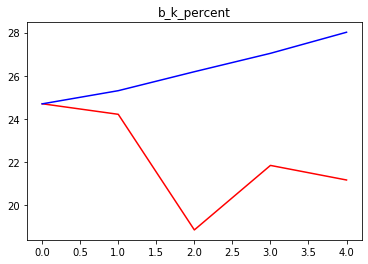

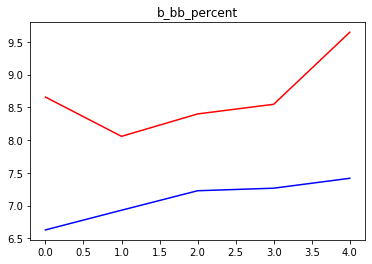

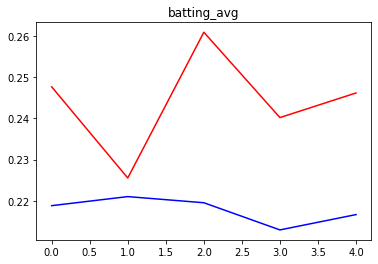

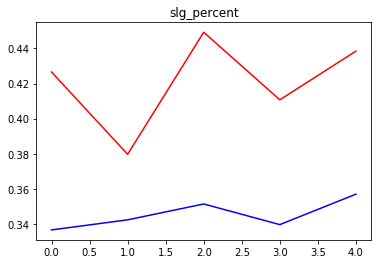

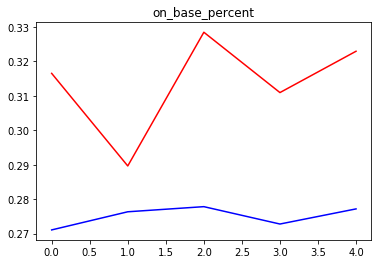

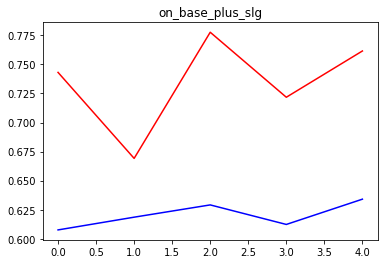

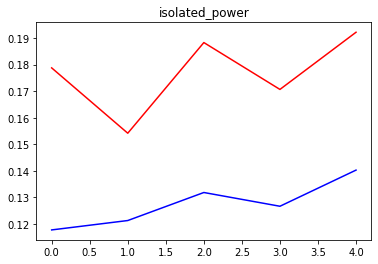

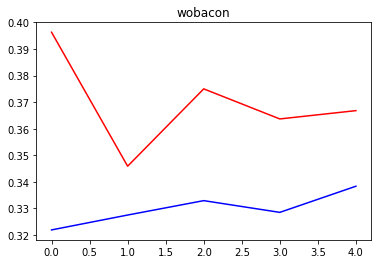

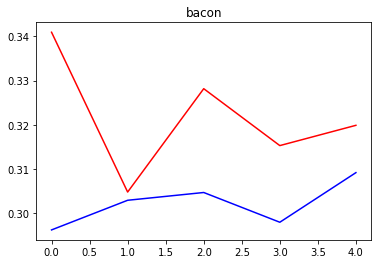

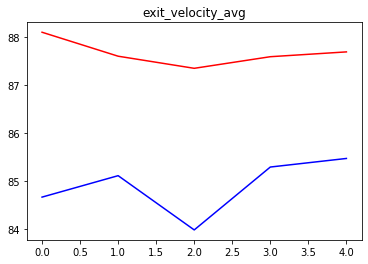

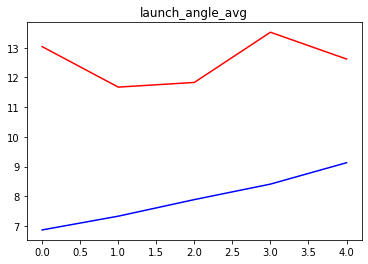

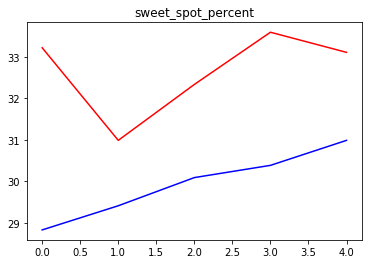

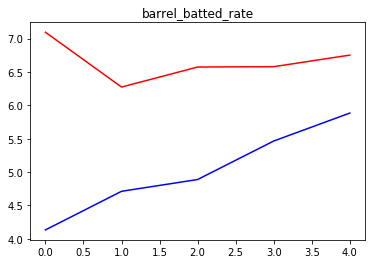

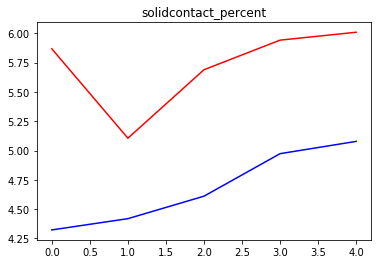

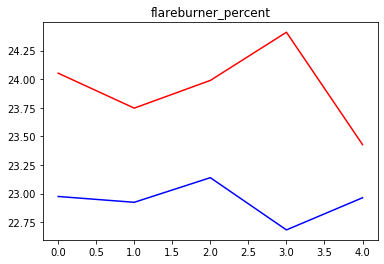

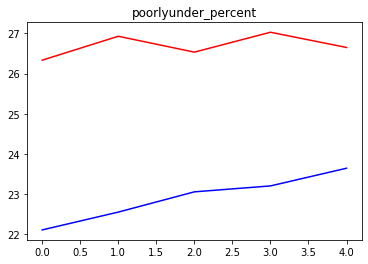

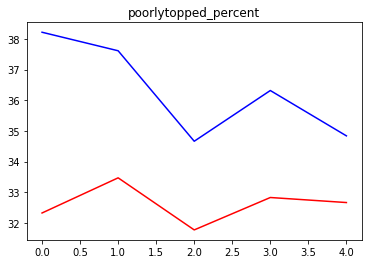

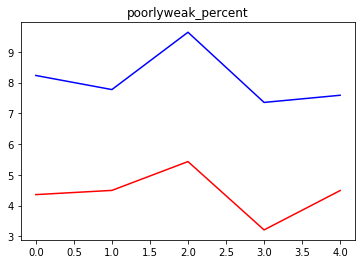

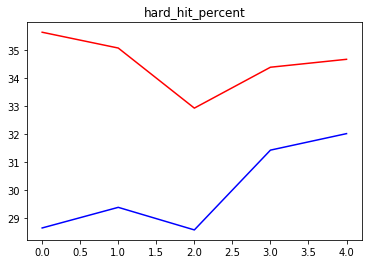

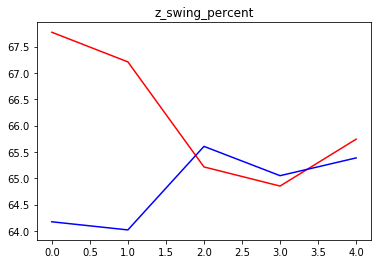

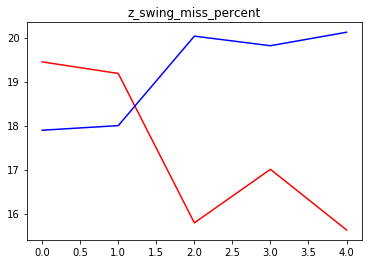

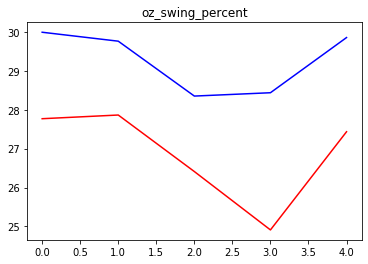

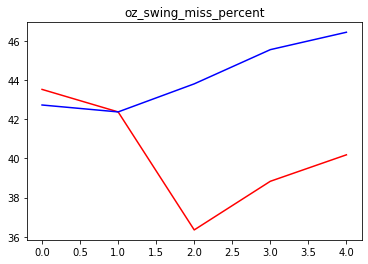

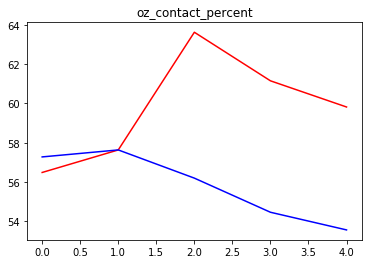

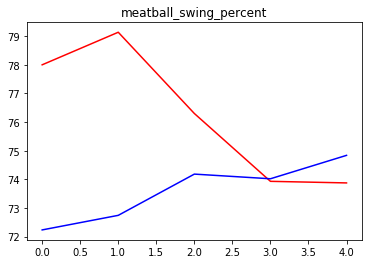

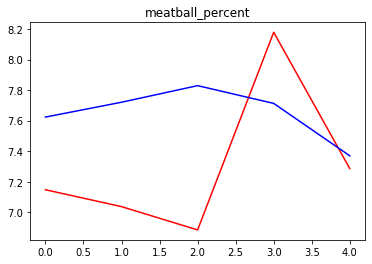

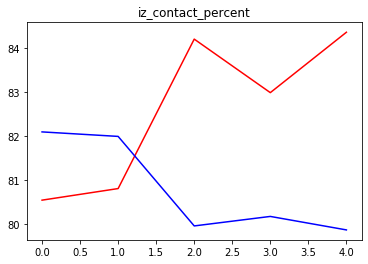

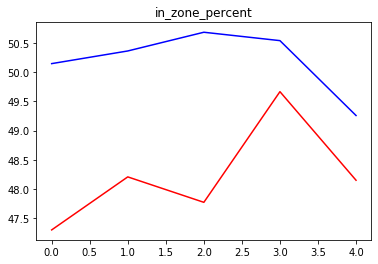

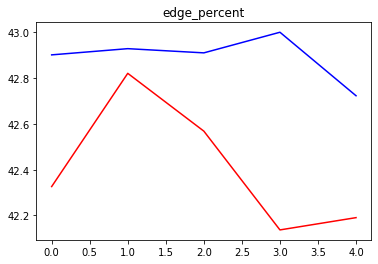

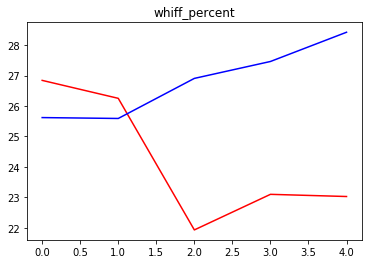

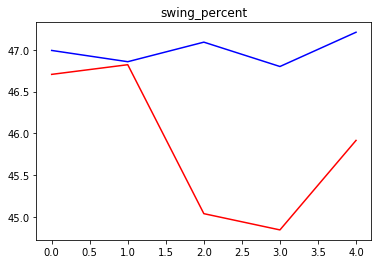

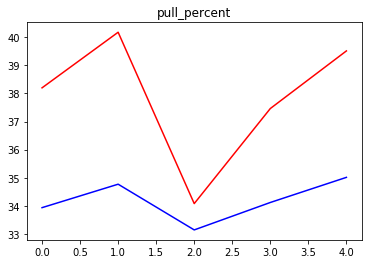

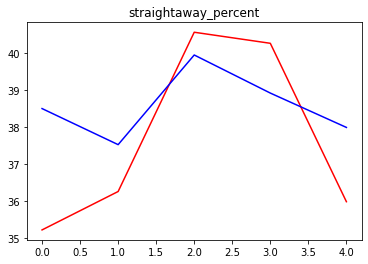

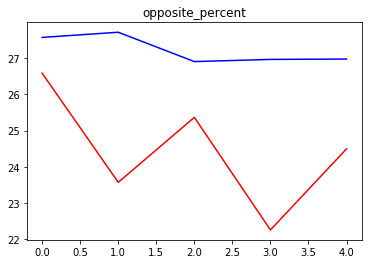

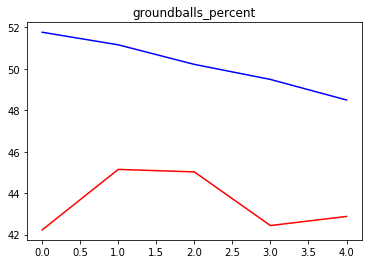

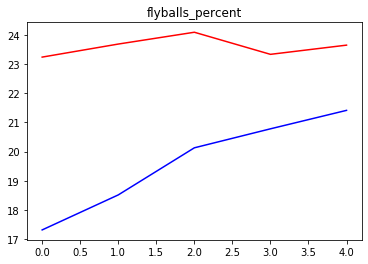

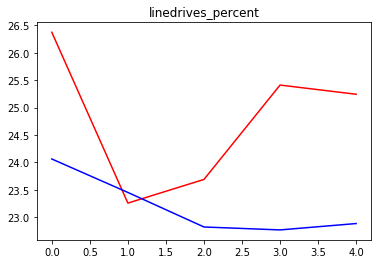

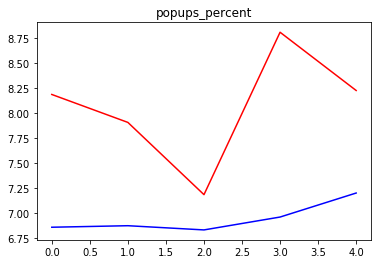

In [30]:
print("COMPARE CHARTS")
for stat_index in range(len(astros_hitters_all_stats)):
    temp = plt.pyplot.figure()
    plt.pyplot.plot(astros_hitters_all_stats[stat_index], 'r') #Astros in red
    plt.pyplot.plot(mlb_all_stats[stat_index], 'b') #mlb in blue
    plt.pyplot.title(testing_columns[stat_index])

In [31]:
comparison_matrix_mlb = pd.DataFrame().append(mlb_all_stats).T
comparison_matrix_astro_hitters = pd.DataFrame().append(astros_hitters_all_stats).T
comparison_matrix_mlb.columns = testing_columns
comparison_matrix_astro_hitters.columns = testing_columns
comparison_matrix_combo = pd.concat([comparison_matrix_mlb, comparison_matrix_astro_hitters], ignore_index=True)
comparison_matrix_2015 = comparison_matrix_combo.iloc[[0,5]]
comparison_matrix_2016 = comparison_matrix_combo.iloc[[1,6]]
comparison_matrix_2017 = comparison_matrix_combo.iloc[[2,7]]
comparison_matrix_2018 = comparison_matrix_combo.iloc[[3,8]]
comparison_matrix_2019 = comparison_matrix_combo.iloc[[4,9]]
# Top row is mlb, bottom row is astros

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


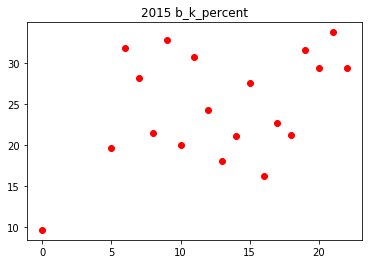

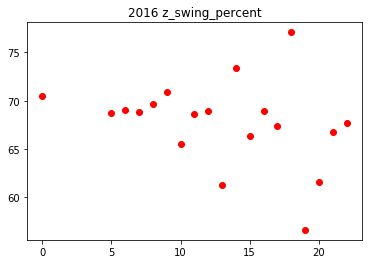

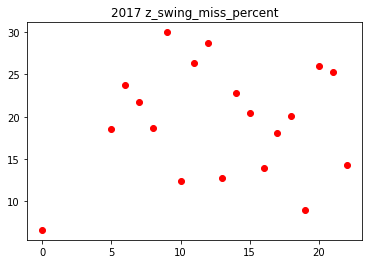

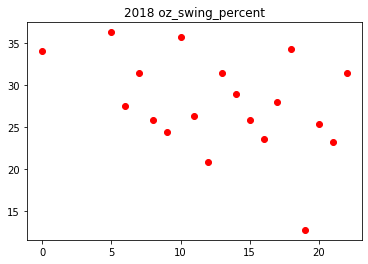

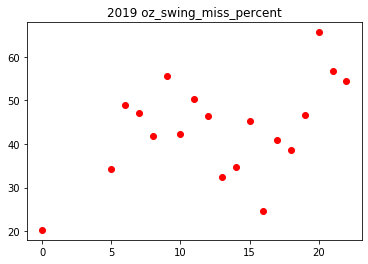

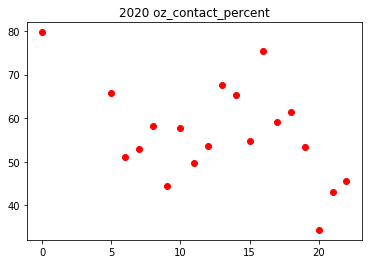

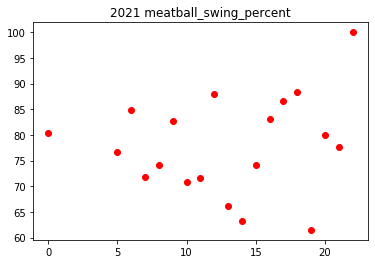

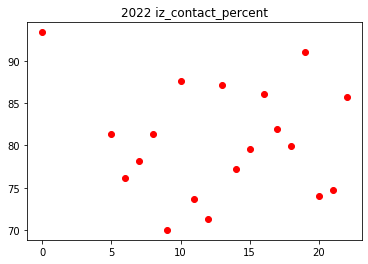

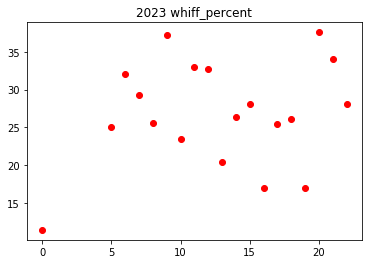

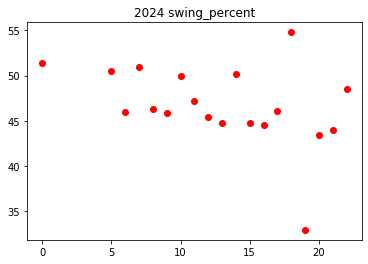

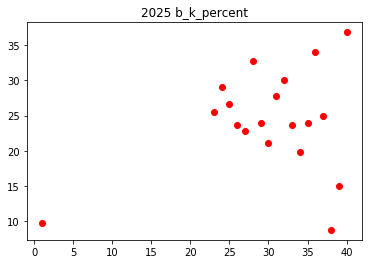

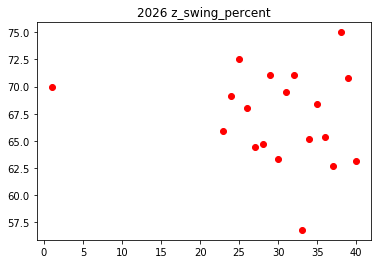

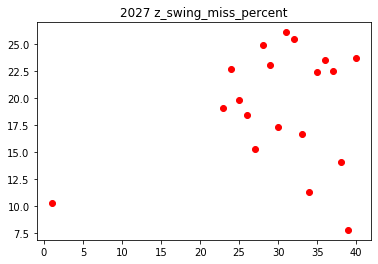

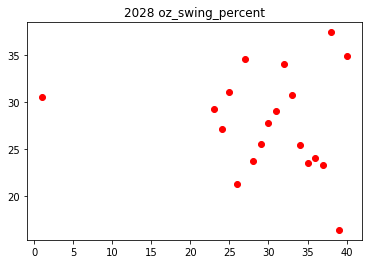

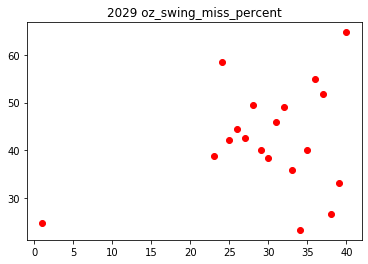

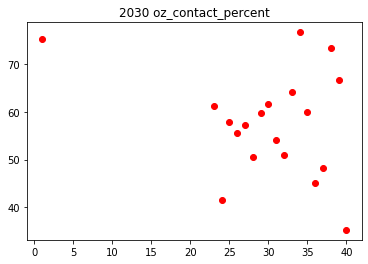

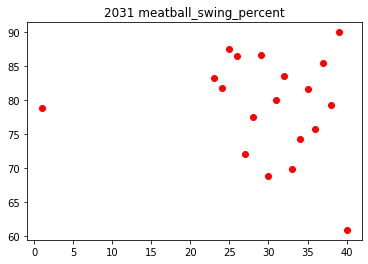

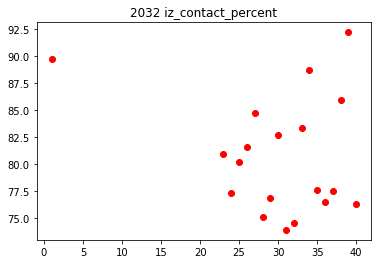

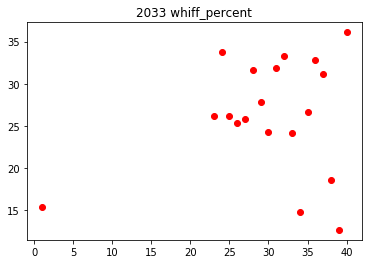

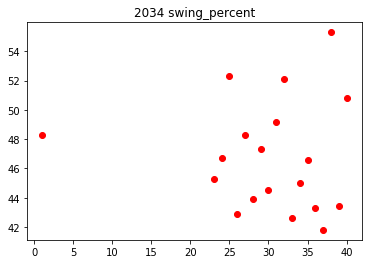

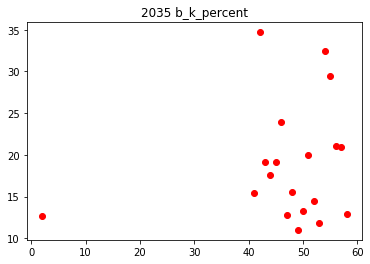

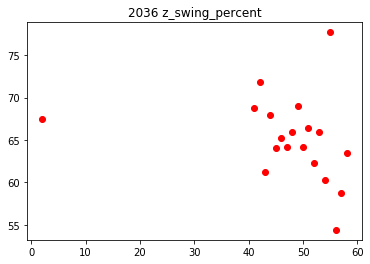

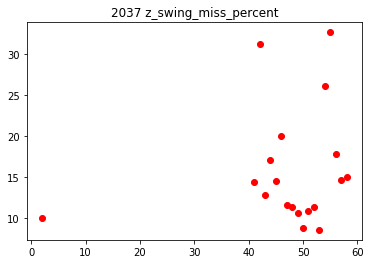

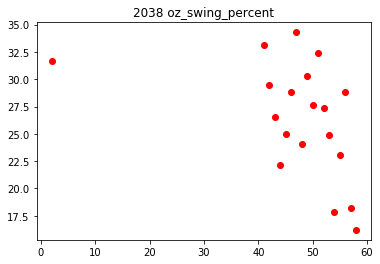

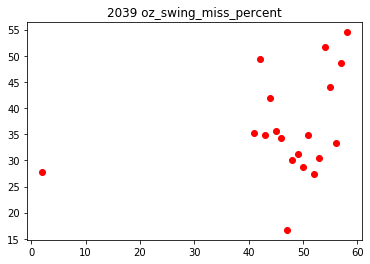

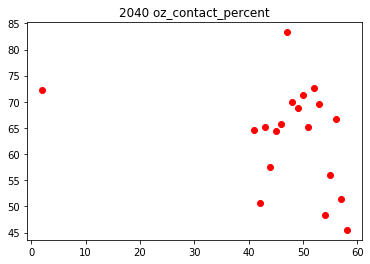

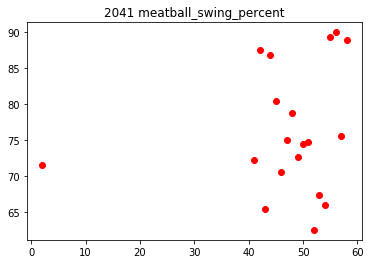

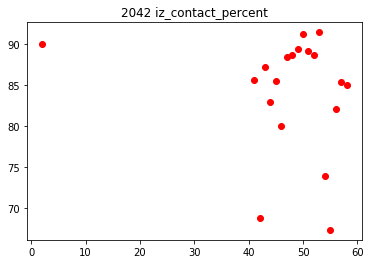

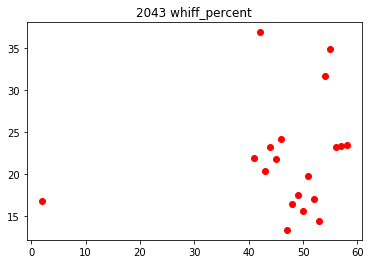

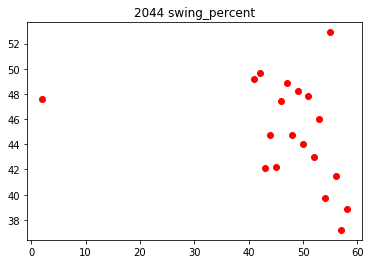

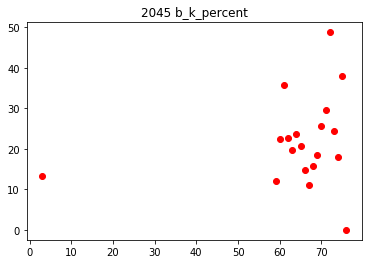

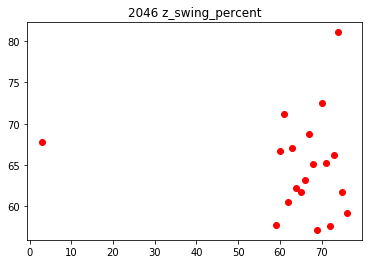

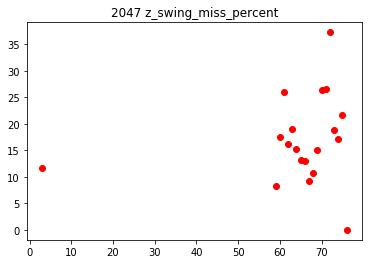

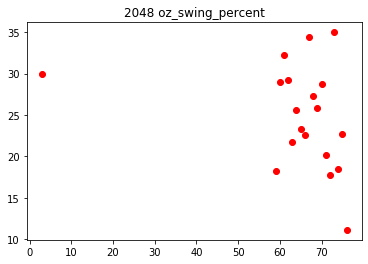

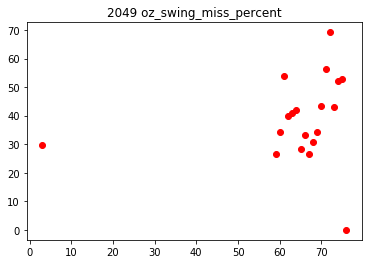

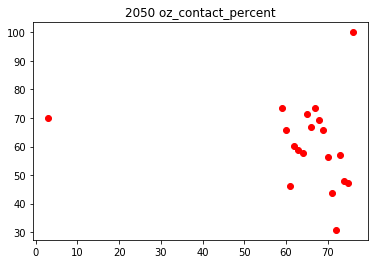

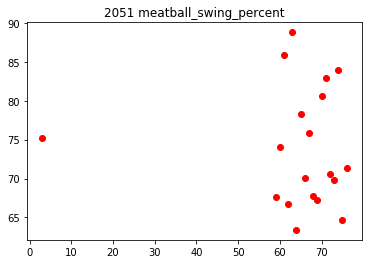

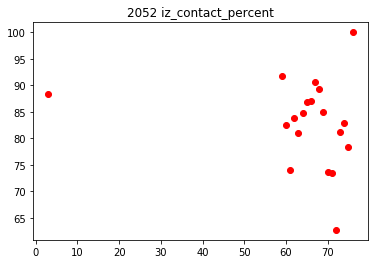

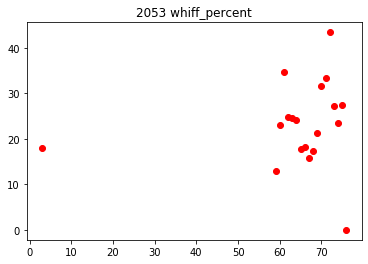

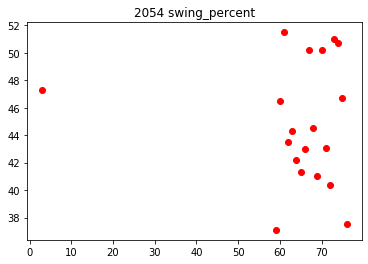

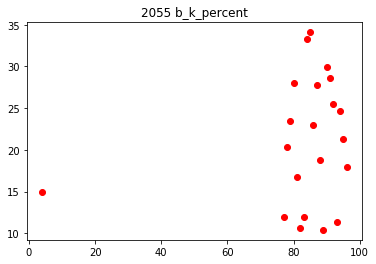

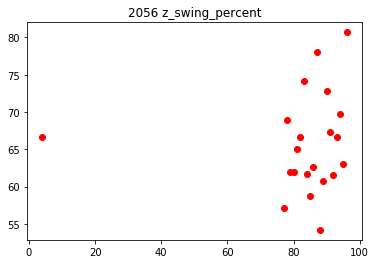

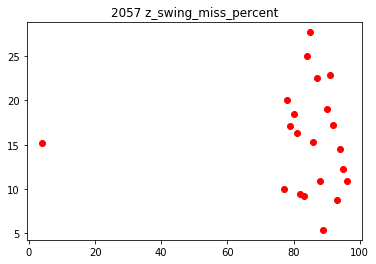

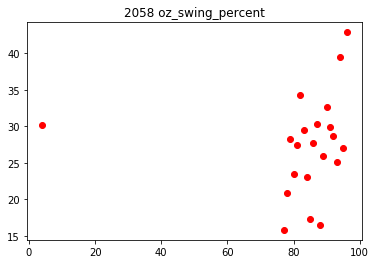

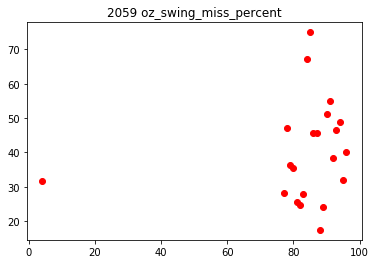

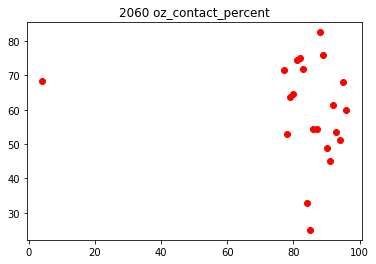

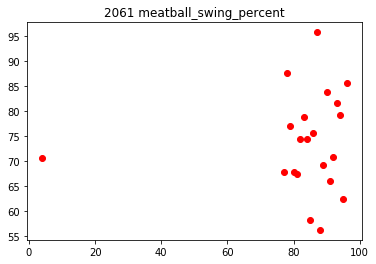

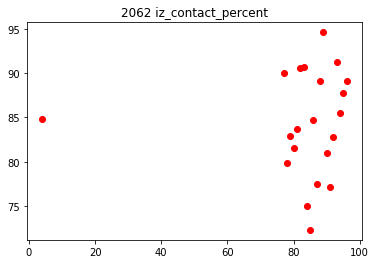

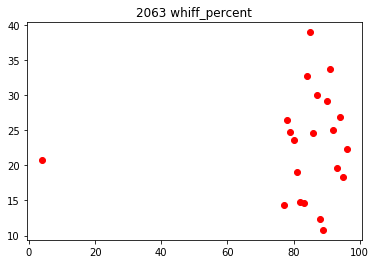

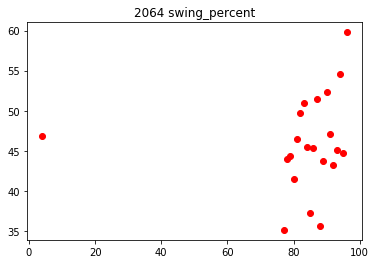

In [50]:
stats_of_interest = [
'b_k_percent',
'z_swing_percent',
'z_swing_miss_percent',
'oz_swing_percent',
'oz_swing_miss_percent',
'oz_contact_percent',
'meatball_swing_percent',
'iz_contact_percent',
'whiff_percent',
'swing_percent'
]
year_count = 2015
for year_stats in astros_hitters_all_years:
    for stat in stats_of_interest:
        temp = plt.pyplot.figure()
        plt.pyplot.plot(year_stats[stat], 'or') #Astros in red
        title = str(year_count) + " " + stat
        plt.pyplot.title(title)
        year_count += 1

In [33]:
all_players_all_years = []
for year in astros_hitters_all_years:
    for index, row in year.iterrows():
        all_players_all_years.append(row[0])
a = Counter(all_players_all_years)
persistent_players = []
for name in a:
    if a[name] > 3:
        persistent_players.append(name)
print(persistent_players)

['Altuve', 'Gattis', 'Marisnick', 'Gonzalez', 'Springer', 'Correa', 'Tucker', 'Stassi', 'White', 'Kemp', 'Bregman', 'Gurriel']


In [34]:
astros_persistent_hittters = pd.DataFrame(columns=dfwh.columns)
for year in astros_hitters_all_years:
    for index, row in year.iterrows():
        if row[0] in persistent_players:
            astros_persistent_hittters = astros_persistent_hittters.append(row)
astros_persistent_hittters

,last_name,first_name,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_foul,b_foul_tip,b_game,b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,b_sac_bunt,b_sac_fly,b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_stolen_base_2b,r_stolen_base_3b,r_stolen_base_home,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,r_total_pickoff,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadif,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrels,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_swing_miss,out_zone_swing,out_zone_percent,out_zone,meatball_swing_percent,meatball_percent,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count,iz_contact_percent,in_zone_swing_miss,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,f_strike_percent,groundballs_percent,groundballs,flyballs_percent,flyballs,linedrives_percent,linedrives,popups_percent,popups
0,Altuve,Jose,2015,25,638,689,200,141,40,4,15,67,33,9.7,4.8,0.313,0.459,0.351,0.810,0.146,66,207,293,13,38,111,662,331,434,9,154,17,0,3,9,95,18,580,85,2,108,198,51,40,30,3,6,130,11,2,0,31,7,0,745,1482,1151,2227,8,0.273,0.390,0.347,0.305,0.317,0.116,0.367,0.317,0.347,0.305,0.040,0.069,0.042,85.8,10.5,31.6,18,3.1,4.8,24.0,26.7,36.4,5.0,28.8,70.5,6.6,34.1,20.3,79.7,81,399,52.5,1170,80.4,7.3,200,1385,587,2227,93.4,49,745,47.5,1057,39.9,889,11.4,51.4,39.8,40.9,19.3,580,39.6,47.6,276,21.7,126,23.4,136,7.2,42
5,Gattis,Evan,2015,29,566,604,139,81,20,11,27,119,30,19.7,5.0,0.246,0.463,0.285,0.748,0.217,88,229,262,1,0,141,663,311,345,18,153,13,0,1,3,45,24,452,69,1,78,178,27,43,12,0,5,265,1,0,0,0,0,0,729,1373,1062,2102,1,0.247,0.415,0.317,0.301,0.288,0.168,0.375,0.355,0.308,0.311,-0.001,0.048,0.016,88.9,10.3,29.9,32,7.1,7.3,21.9,25.0,35.4,3.3,39.2,68.7,18.6,36.3,34.3,65.7,147,429,56.2,1181,76.7,5.7,279,1132,656,2102,81.4,118,633,43.8,921,42.5,893,25.0,50.5,36.9,40.5,22.6,452,35.8,46.5,210,22.6,102,21.2,96,9.7,44
7,Marisnick,Jake,2015,24,339,372,80,52,15,4,9,105,18,28.2,4.8,0.236,0.383,0.277,0.660,0.147,36,147,130,9,24,88,442,211,278,20,133,2,0,1,5,30,10,244,40,0,44,82,22,18,0,6,4,216,6,2,1,19,5,0,484,965,754,1449,3,0.229,0.354,0.288,0.277,0.275,0.125,0.376,0.358,0.336,0.327,0.007,0.029,0.011,83.1,11.2,32.4,13,5.3,3.3,24.2,25.8,32.4,9.0,26.2,68.8,21.8,31.5,47.0,53.0,103,219,48.0,695,71.9,8.4,174,887,375,1449,78.2,113,519,52.0,754,44.4,644,29.3,50.9,38.5,33.2,28.3,244,32.8,45.1,110,22.1,54,25.4,62,7.4,18
10,Gonzalez,Marwin,2015,26,344,370,96,65,18,1,12,74,16,20.0,4.3,0.279,0.442,0.311,0.753,0.163,34,136,152,5,4,77,394,211,223,8,120,9,0,2,3,37,10,277,49,0,36,105,25,24,0,7,0,154,5,0,0,3,1,0,426,884,673,1310,0,0.255,0.377,0.329,0.295,0.294,0.120,0.393,0.348,0.356,0.326,0.024,0.065,0.034,86.5,9.1,31.8,10,3.6,5.8,27.4,23.1,33.9,6.1,34.3,65.5,12.4,35.7,42.2,57.8,103,244,52.2,684,70.9,8.4,242,735,327,1310,87.6,51,410,47.8,626,41.4,542,23.5,49.9,44.4,37.5,18.1,277,30.3,48.0,133,16.6,46,26.7,74,8.7,24
12,Springer,George,2015,26,388,451,107,70,19,2,16,109,50,24.2,11.1,0.276,0.459,0.366,0.825,0.183,41,138,178,4,16,82,677,244,263,18,102,4,0,2,8,33,12,284,62,0,43,102,23,13,0,2,3,266,4,0,0,14,2,0,730,1060,816,1790,3,0.275,0.468,0.360,0.363,0.368,0.193,0.432,0.435,0.379,0.380,0.001,-0.009,-0.003,89.6,8.8,36.3,28,9.9,6.0,25.7,20.4,33

In [35]:
stats_of_interest_plus = stats_of_interest.copy()
stats_of_interest_plus.insert(0,"last_name")
print(stats_of_interest_plus)

['last_name', 'b_k_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent', 'iz_contact_percent', 'whiff_percent', 'swing_percent']


In [36]:
astros_persistent_hitters_averages_precheat = pd.DataFrame(columns=stats_of_interest_plus)
astros_persistent_hitters_averages_precheat_dict = {}
for name in persistent_players:
    astros_persistent_hitters_averages_precheat_dict[name] = []
for stat in stats_of_interest:
    for name in persistent_players:
        stat_years_list_per_player = []
        for year in astros_hitters_all_years[:2]: #first two years without cheating
            for index, row in year.iterrows():
                if row[0] == name:
                    stat_years_list_per_player.append(row.loc[stat])
        stat_avg = sum(stat_years_list_per_player)/len(stat_years_list_per_player)
        astros_persistent_hitters_averages_precheat_dict[name].append((stat, stat_avg))

In [37]:
index_count = 0
for key in astros_persistent_hitters_averages_precheat_dict.keys():
    temp = []
    for i in astros_persistent_hitters_averages_precheat_dict[key]:
        temp.append(i[1])
    astros_persistent_hitters_averages_precheat.loc[index_count] = [key] + temp
    index_count += 1

In [38]:
astros_persistent_hitters_averages_precheat

,last_name,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
0,Altuve,9.75,70.25,8.45,32.30,22.60,77.40,79.60,91.55,13.40,49.85
1,Gattis,22.60,67.30,18.85,32.75,36.60,63.40,79.95,81.15,25.60,47.90
2,Marisnick,27.45,70.65,20.80,31.30,44.55,55.45,79.75,79.20,27.75,51.60
3,Gonzalez,21.40,64.95,13.85,35.15,42.45,57.55,71.50,86.15,24.65,49.10
4,Springer,24.05,70.00,25.90,23.20,43.30,56.70,87.30,74.10,30.30,46.35
5,Correa,19.60,62.30,15.05,29.60,35.40,64.60,67.45,84.95,22.35,44.60
6,Tucker,24.45,71.45,24.45,28.95,40.30,59.70,71.65,75.55,29.15,49.70
7,Stassi,29.40,67.70,14.30,31.40,54.50,45.50,100.00,85.70,28.10,48.50
8,White,23.60,56.80,16.70,30.70,35.90,64.10,69.90,83.30,24.20,42.60
9,Kemp,19.90,65.20,11.30,25.40,23.40,76.60,74.30,88.70,14.80,45.00


In [39]:
astros_persistent_hitters_averages_postcheat = pd.DataFrame(columns=stats_of_interest_plus)
astros_persistent_hitters_averages_postcheat_dict = {}
for name in persistent_players:
    astros_persistent_hitters_averages_postcheat_dict[name] = []
for stat in stats_of_interest:
    for name in persistent_players:
        stat_years_list_per_player = []
        for year in astros_hitters_all_years[2:]: #final three years with cheating
            for index, row in year.iterrows():
                if row[0] == name:
                    stat_years_list_per_player.append(row.loc[stat])
        stat_avg = sum(stat_years_list_per_player)/len(stat_years_list_per_player)
        astros_persistent_hitters_averages_postcheat_dict[name].append((stat, stat_avg))

In [40]:
index_count = 0
for key in astros_persistent_hitters_averages_postcheat_dict.keys():
    temp = []
    for i in astros_persistent_hitters_averages_postcheat_dict[key]:
        temp.append(i[1])
    astros_persistent_hitters_averages_postcheat.loc[index_count] = [key] + temp
    index_count += 1

In [41]:
astros_persistent_hitters_averages_postcheat

,last_name,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
0,Altuve,13.633333,67.300000,12.266667,30.633333,29.800000,70.200000,72.466667,87.733333,18.500000,47.233333
1,Gattis,18.900000,67.750000,15.950000,31.050000,34.800000,65.200000,73.100000,84.050000,22.550000,47.850000
2,Marisnick,33.433333,71.933333,25.433333,31.466667,51.466667,48.533333,85.766667,74.566667,33.600000,51.166667
3,Gonzalez,21.000000,60.850000,14.500000,27.850000,37.400000,62.600000,66.050000,85.500000,22.600000,42.800000
4,Springer,19.200000,68.000000,18.766667,21.533333,43.366667,56.400000,87.766667,81.233333,24.800000,44.333333
5,Correa,22.066667,62.733333,15.633333,26.266667,38.000000,62.000000,73.666667,84.366667,23.566667,42.900000
6,Tucker,22.950000,79.600000,19.850000,24.400000,48.750000,51.250000,89.900000,80.150000,26.750000,51.050000
7,Stassi,25.266667,63.466667,22.200000,19.766667,59.400000,40.600000,82.100000,77.800000,29.900000,42.466667
8,White,24.200000,62.933333,17.233333,25.166667,32.666667,67.333333,72.233333,82.766667,21.866667,43.366667
9,Kemp,14.833333,64.133333,13.633333,28.133333,25.200000,74.800000,70.866667,86.366667,16.933333,46.133333


In [42]:
astros_persistent_hitters_averages_differences_prepost_cheat = astros_persistent_hitters_averages_postcheat.set_index('last_name').subtract(astros_persistent_hitters_averages_precheat.set_index('last_name'), fill_value=0)
astros_persistent_hitters_averages_differences_prepost_cheat

,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
last_name,,,,,,,,,,
Altuve,3.883333,-2.950000,3.816667,-1.666667,7.200000,-7.200000,-7.133333,-3.816667,5.100000,-2.616667
Gattis,-3.700000,0.450000,-2.900000,-1.700000,-1.800000,1.800000,-6.850000,2.900000,-3.050000,-0.050000
Marisnick,5.983333,1.283333,4.633333,0.166667,6.916667,-6.916667,6.016667,-4.633333,5.850000,-0.433333
Gonzalez,-0.400000,-4.100000,0.650000,-7.300000,-5.050000,5.050000,-5.450000,-0.650000,-2.050000,-6.300000
Springer,-4.850000,-2.000000,-7.133333,-1.666667,0.066667,-0.300000,0.466667,7.133333,-5.500000,-2.016667
Correa,2.466667,0.433333,0.583333,-3.333333,2.600000,-2.600000,6.216667,-0.583333,1.216667,-1.700000
Tucker,-1.500000,8.150000,-4.600000,-4.550000,8.450000,-8.450000,18.250000,4.600000,-2.400000,1.350000
Stassi,-4.133333,-4.233333,7.900000,-11.633333,4.900000,-4.900000,-17.900000,-7.900000,1.800000,-6.033333
White,0.600000,6.133333,0.533333,-5.533333,-3.233333,3.233333,2.333333,-0.533333,-2.333333,0.766667


In [43]:
astros_persistent_hitters_averages_differences_prepost_cheat.mean()

b_k_percent              -1.287500
z_swing_percent          -1.077778
z_swing_miss_percent     -0.918056
oz_swing_percent         -3.584722
oz_swing_miss_percent     0.915278
oz_contact_percent       -0.934722
meatball_swing_percent   -1.895833
iz_contact_percent        0.918056
whiff_percent            -1.161111
swing_percent            -2.455556
dtype: float64

In [44]:
astros_persistent_hitters_averages_differences_prepost_cheat.max()

b_k_percent                5.983333
z_swing_percent            8.150000
z_swing_miss_percent       7.900000
oz_swing_percent           2.733333
oz_swing_miss_percent      8.450000
oz_contact_percent        11.700000
meatball_swing_percent    18.250000
iz_contact_percent        12.533333
whiff_percent              5.850000
swing_percent              1.350000
dtype: float64

In [45]:
astros_persistent_hitters_averages_differences_prepost_cheat.min()

b_k_percent              -10.800000
z_swing_percent           -8.133333
z_swing_miss_percent     -12.533333
oz_swing_percent         -11.633333
oz_swing_miss_percent    -11.700000
oz_contact_percent        -8.450000
meatball_swing_percent   -17.900000
iz_contact_percent        -7.900000
whiff_percent            -12.133333
swing_percent             -7.633333
dtype: float64

In [46]:
# astros_persistent_hitters_averages_differences_prepost_cheat.loc[:,"b_k_percent":"z_swing_percent"]
astros_persistent_hitters_averages_differences_prepost_cheat

,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
last_name,,,,,,,,,,
Altuve,3.883333,-2.950000,3.816667,-1.666667,7.200000,-7.200000,-7.133333,-3.816667,5.100000,-2.616667
Gattis,-3.700000,0.450000,-2.900000,-1.700000,-1.800000,1.800000,-6.850000,2.900000,-3.050000,-0.050000
Marisnick,5.983333,1.283333,4.633333,0.166667,6.916667,-6.916667,6.016667,-4.633333,5.850000,-0.433333
Gonzalez,-0.400000,-4.100000,0.650000,-7.300000,-5.050000,5.050000,-5.450000,-0.650000,-2.050000,-6.300000
Springer,-4.850000,-2.000000,-7.133333,-1.666667,0.066667,-0.300000,0.466667,7.133333,-5.500000,-2.016667
Correa,2.466667,0.433333,0.583333,-3.333333,2.600000,-2.600000,6.216667,-0.583333,1.216667,-1.700000
Tucker,-1.500000,8.150000,-4.600000,-4.550000,8.450000,-8.450000,18.250000,4.600000,-2.400000,1.350000
Stassi,-4.133333,-4.233333,7.900000,-11.633333,4.900000,-4.900000,-17.900000,-7.900000,1.800000,-6.033333
White,0.600000,6.133333,0.533333,-5.533333,-3.233333,3.233333,2.333333,-0.533333,-2.333333,0.766667


In [47]:
index_count = 1
for i  in astros_persistent_hitters_averages_differences_prepost_cheat.min():
    print(stats_of_interest_plus[index_count])
    print(astros_persistent_hitters_averages_differences_prepost_cheat.loc[astros_persistent_hitters_averages_differences_prepost_cheat[stats_of_interest_plus[index_count]] == i].index[0])
    index_count += 1
    print("______________")

b_k_percent
Bregman
______________
z_swing_percent
Bregman
______________
z_swing_miss_percent
Bregman
______________
oz_swing_percent
Stassi
______________
oz_swing_miss_percent
Bregman
______________
oz_contact_percent
Tucker
______________
meatball_swing_percent
Stassi
______________
iz_contact_percent
Stassi
______________
whiff_percent
Bregman
______________
swing_percent
Bregman
______________


In [48]:
index_count = 1
for i  in astros_persistent_hitters_averages_differences_prepost_cheat.max():
    print(stats_of_interest_plus[index_count])
    print(astros_persistent_hitters_averages_differences_prepost_cheat.loc[astros_persistent_hitters_averages_differences_prepost_cheat[stats_of_interest_plus[index_count]] == i].index[0])
    index_count += 1
    print("______________")

b_k_percent
Marisnick
______________
z_swing_percent
Tucker
______________
z_swing_miss_percent
Stassi
______________
oz_swing_percent
Kemp
______________
oz_swing_miss_percent
Tucker
______________
oz_contact_percent
Bregman
______________
meatball_swing_percent
Tucker
______________
iz_contact_percent
Bregman
______________
whiff_percent
Marisnick
______________
swing_percent
Tucker
______________


In [57]:
astros_persistent_hitters_averages_differences_prepost_cheat.loc[:,"b_k_percent":"oz_contact_percent"]

,b_k_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent
last_name,,,,,,
Altuve,3.883333,-2.950000,3.816667,-1.666667,7.200000,-7.200000
Gattis,-3.700000,0.450000,-2.900000,-1.700000,-1.800000,1.800000
Marisnick,5.983333,1.283333,4.633333,0.166667,6.916667,-6.916667
Gonzalez,-0.400000,-4.100000,0.650000,-7.300000,-5.050000,5.050000
Springer,-4.850000,-2.000000,-7.133333,-1.666667,0.066667,-0.300000
Correa,2.466667,0.433333,0.583333,-3.333333,2.600000,-2.600000
Tucker,-1.500000,8.150000,-4.600000,-4.550000,8.450000,-8.450000
Stassi,-4.133333,-4.233333,7.900000,-11.633333,4.900000,-4.900000
White,0.600000,6.133333,0.533333,-5.533333,-3.233333,3.233333


In [58]:
astros_persistent_hitters_averages_differences_prepost_cheat.loc[:,"meatball_swing_percent":"swing_percent"]

,meatball_swing_percent,iz_contact_percent,whiff_percent,swing_percent
last_name,,,,
Altuve,-7.133333,-3.816667,5.100000,-2.616667
Gattis,-6.850000,2.900000,-3.050000,-0.050000
Marisnick,6.016667,-4.633333,5.850000,-0.433333
Gonzalez,-5.450000,-0.650000,-2.050000,-6.300000
Springer,0.466667,7.133333,-5.500000,-2.016667
Correa,6.216667,-0.583333,1.216667,-1.700000
Tucker,18.250000,4.600000,-2.400000,1.350000
Stassi,-17.900000,-7.900000,1.800000,-6.033333
White,2.333333,-0.533333,-2.333333,0.766667
